In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')
data

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [3]:
data.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [4]:
# decision about needed columns, chose the relevant only
data_subset=data[['tree_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'steward', 'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
data_subset

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No


In [5]:
# check missing values
data_subset.isnull().sum()

tree_id           0
created_at        0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
steward       31615
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
dtype: int64

In [6]:
# check if these missing values happen all at the same time or not
# if there no informationa about health so that there no information about problems
data_subset[data_subset['health'].isnull()]

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,09/09/2015,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,08/29/2015,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,09/07/2015,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,09/08/2015,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,09/04/2015,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,08/18/2015,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,08/24/2015,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,08/26/2015,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683698,193791,09/01/2015,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [7]:
# distrubution of values: tree diameter and stump diameter
data_subset.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


In [8]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tree_id     683788 non-null  int64 
 1   created_at  683788 non-null  object
 2   tree_dbh    683788 non-null  int64 
 3   stump_diam  683788 non-null  int64 
 4   curb_loc    683788 non-null  object
 5   status      683788 non-null  object
 6   health      652172 non-null  object
 7   spc_latin   652169 non-null  object
 8   steward     652173 non-null  object
 9   sidewalk    652172 non-null  object
 10  problems    652124 non-null  object
 11  root_stone  683788 non-null  object
 12  root_grate  683788 non-null  object
 13  root_other  683788 non-null  object
 14  trunk_wire  683788 non-null  object
 15  trnk_light  683788 non-null  object
 16  trnk_other  683788 non-null  object
 17  brch_light  683788 non-null  object
 18  brch_shoe   683788 non-null  object
 19  brch_other  683788 non-

array([[<AxesSubplot:title={'center':'tree_id'}>,
        <AxesSubplot:title={'center':'tree_dbh'}>],
       [<AxesSubplot:title={'center':'stump_diam'}>, <AxesSubplot:>]],
      dtype=object)

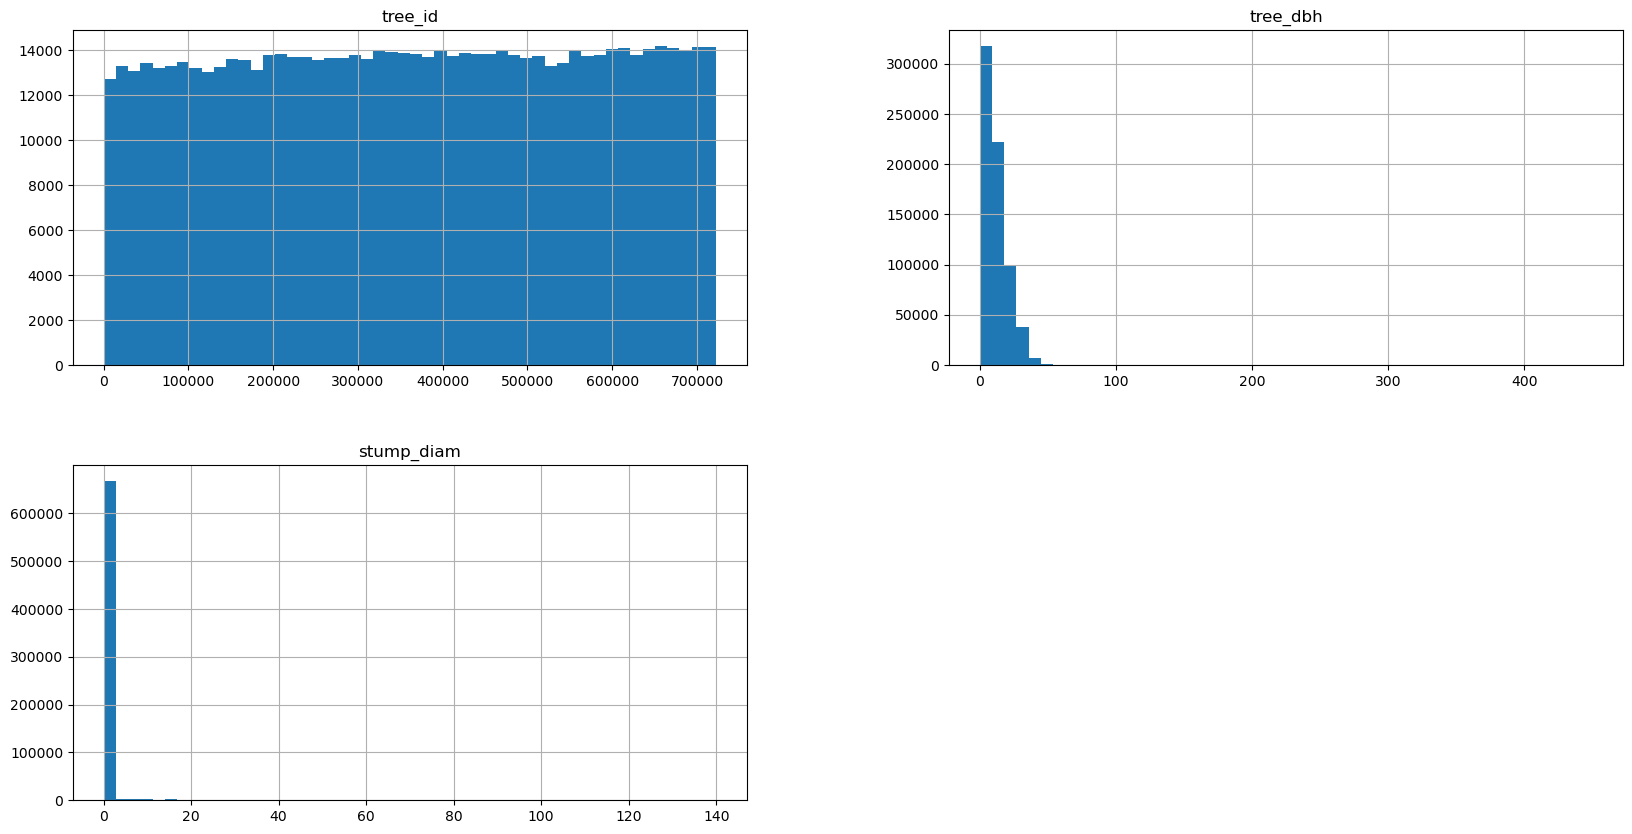

In [9]:
# distribution of numeric values using histograms, some values look suspicious
# because x-axes of 'tree_dbh' and 'stamp_diam' hav too large values
data_subset.hist(bins=50, figsize=(20,10))

In [10]:
# check the quantity of trees with diameter > 50 inches
big_trees=data_subset[data_subset['tree_dbh']>50]
big_trees

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,08/23/2015,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3738,199546,09/03/2015,51,0,OnCurb,Alive,Good,Acer saccharinum,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
4887,139665,08/12/2015,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
6724,209349,09/08/2015,122,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
10083,215075,09/11/2015,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675265,179496,08/27/2015,52,0,OffsetFromCurb,Alive,Good,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
677954,166796,08/22/2015,54,0,OnCurb,Alive,Good,Acer saccharinum,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
679894,169501,08/23/2015,51,0,OnCurb,Alive,Good,Quercus alba,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
681736,179366,08/27/2015,281,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No


<AxesSubplot:xlabel='tree_id', ylabel='tree_dbh'>

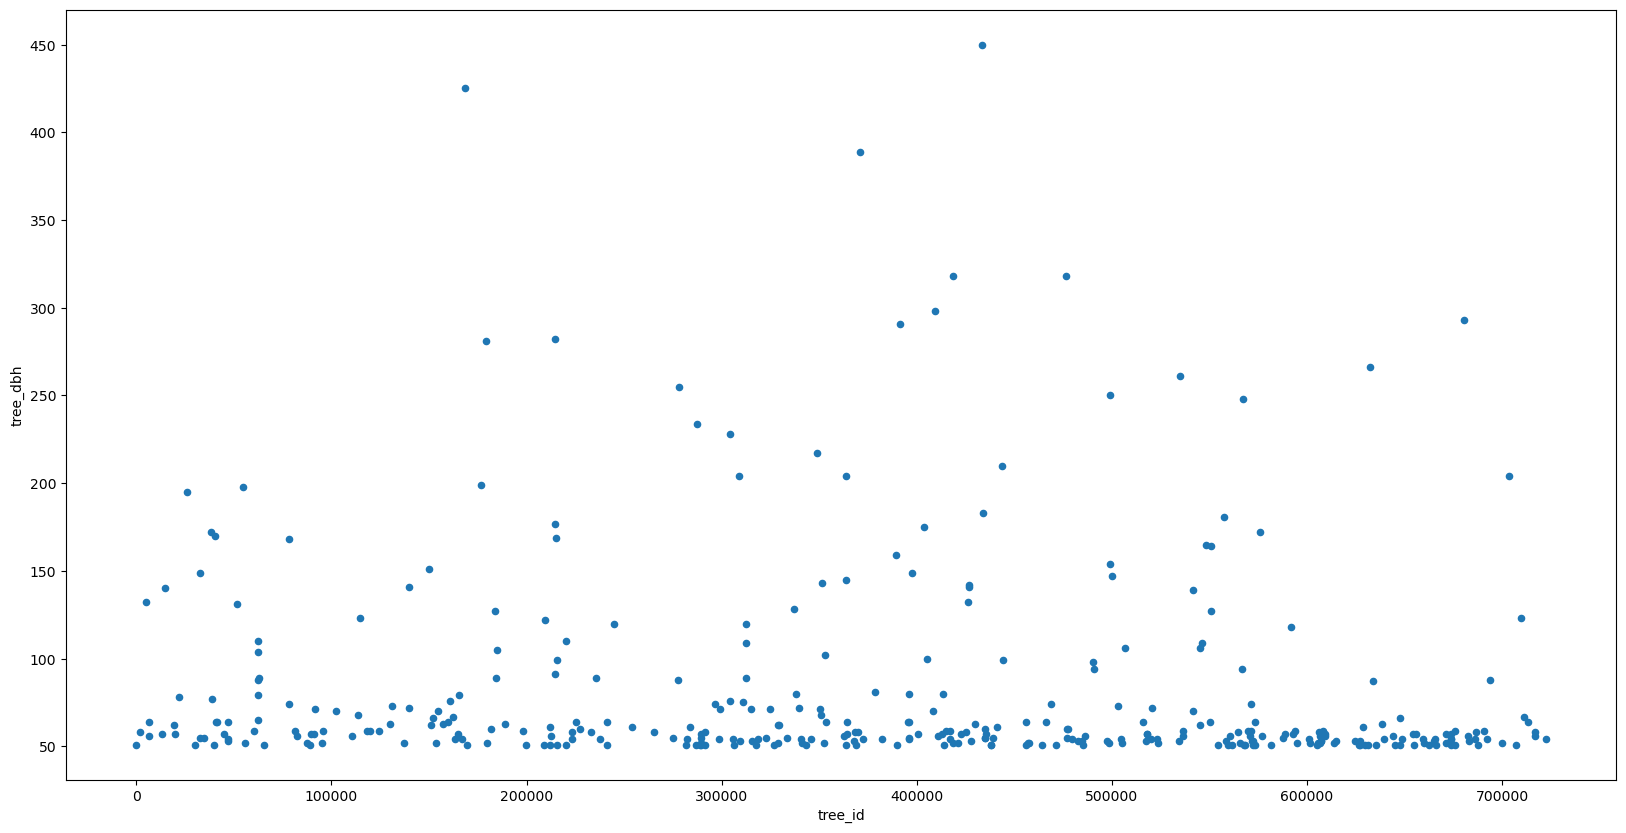

In [11]:
# check deeper list of trees with diameter > 50 inches
# we can see some observations that look like the outliers
big_trees[['tree_id','tree_dbh']].plot(kind='scatter', 
                                       x='tree_id', 
                                       y='tree_dbh',
                                       figsize=(20,10)
                                      )

In [12]:
# check the list of stumps with diameter > 50
big_stumps=data_subset[data_subset['stump_diam']>50]
big_stumps

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
6122,200925,09/04/2015,0,52,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
6177,200924,09/04/2015,0,55,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
6466,166008,08/22/2015,0,72,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
7042,206818,09/06/2015,0,100,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
9872,192215,08/31/2015,0,53,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645994,135904,08/11/2015,0,65,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646336,151125,08/16/2015,0,55,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
649174,154188,08/17/2015,0,65,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
652690,154181,08/17/2015,0,60,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


<AxesSubplot:xlabel='tree_id', ylabel='stump_diam'>

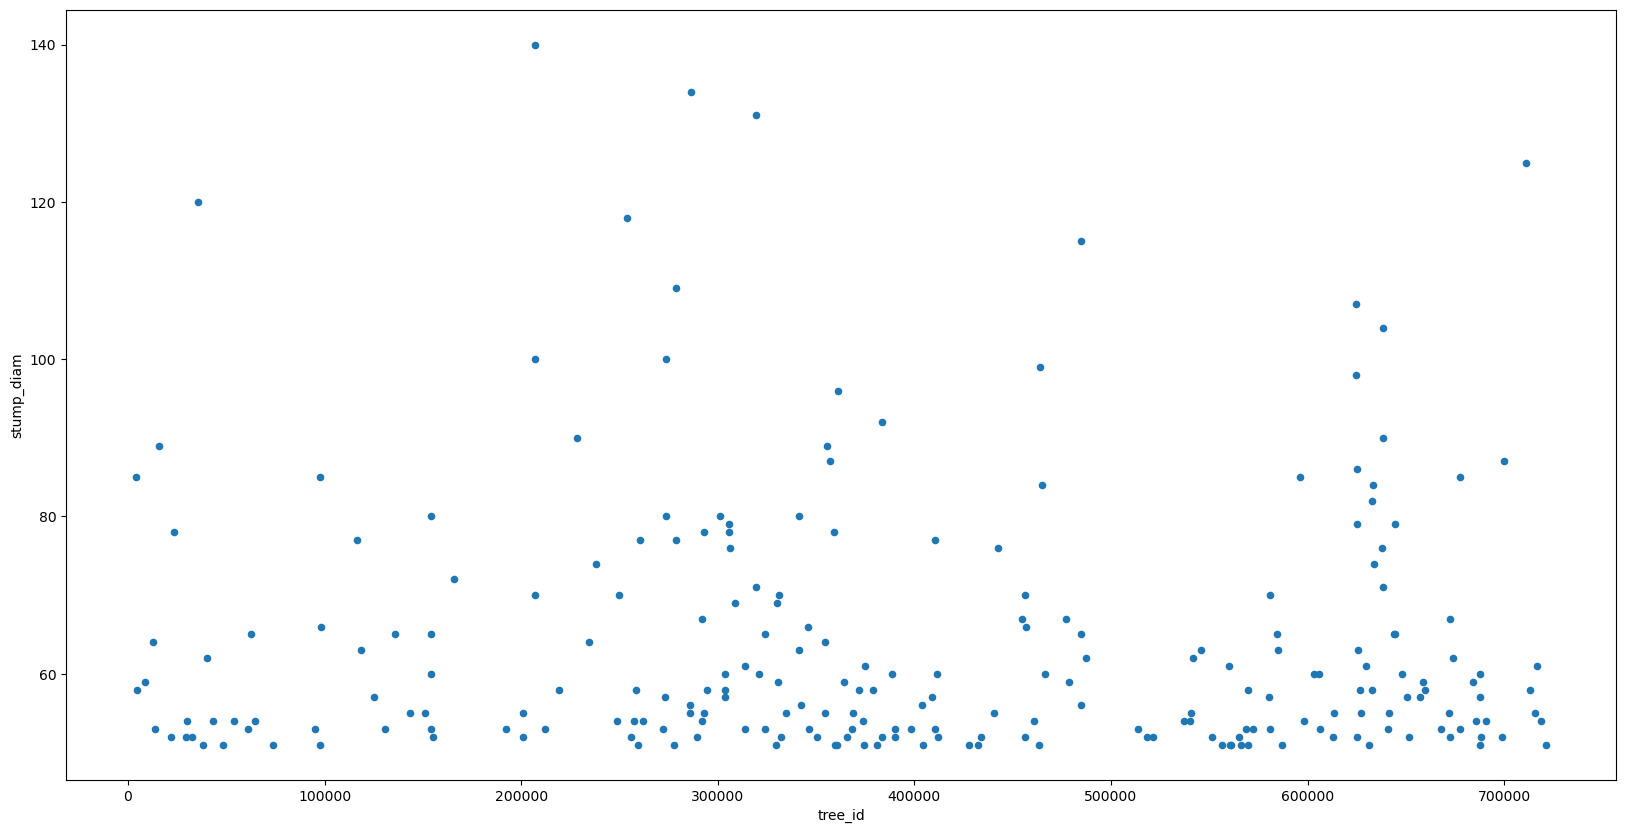

In [13]:
# make a visualization to check the outliers
# we can see some observations that look like the outliers
big_stumps[['tree_id','stump_diam']].plot(kind='scatter', 
                                       x='tree_id', 
                                       y='stump_diam',
                                       figsize=(20,10)
                                      )

In [14]:
# check the quanttity of trees by type
data_subset['spc_latin'].value_counts()

Platanus x acerifolia                 87014
Gleditsia triacanthos var. inermis    64264
Pyrus calleryana                      58931
Quercus palustris                     53185
Acer platanoides                      34189
                                      ...  
Pinus nigra                              37
Pinus rigida                             33
Maclura pomifera                         29
Pinus sylvestris                         25
Pinus virginiana                         10
Name: spc_latin, Length: 132, dtype: int64

<AxesSubplot:>

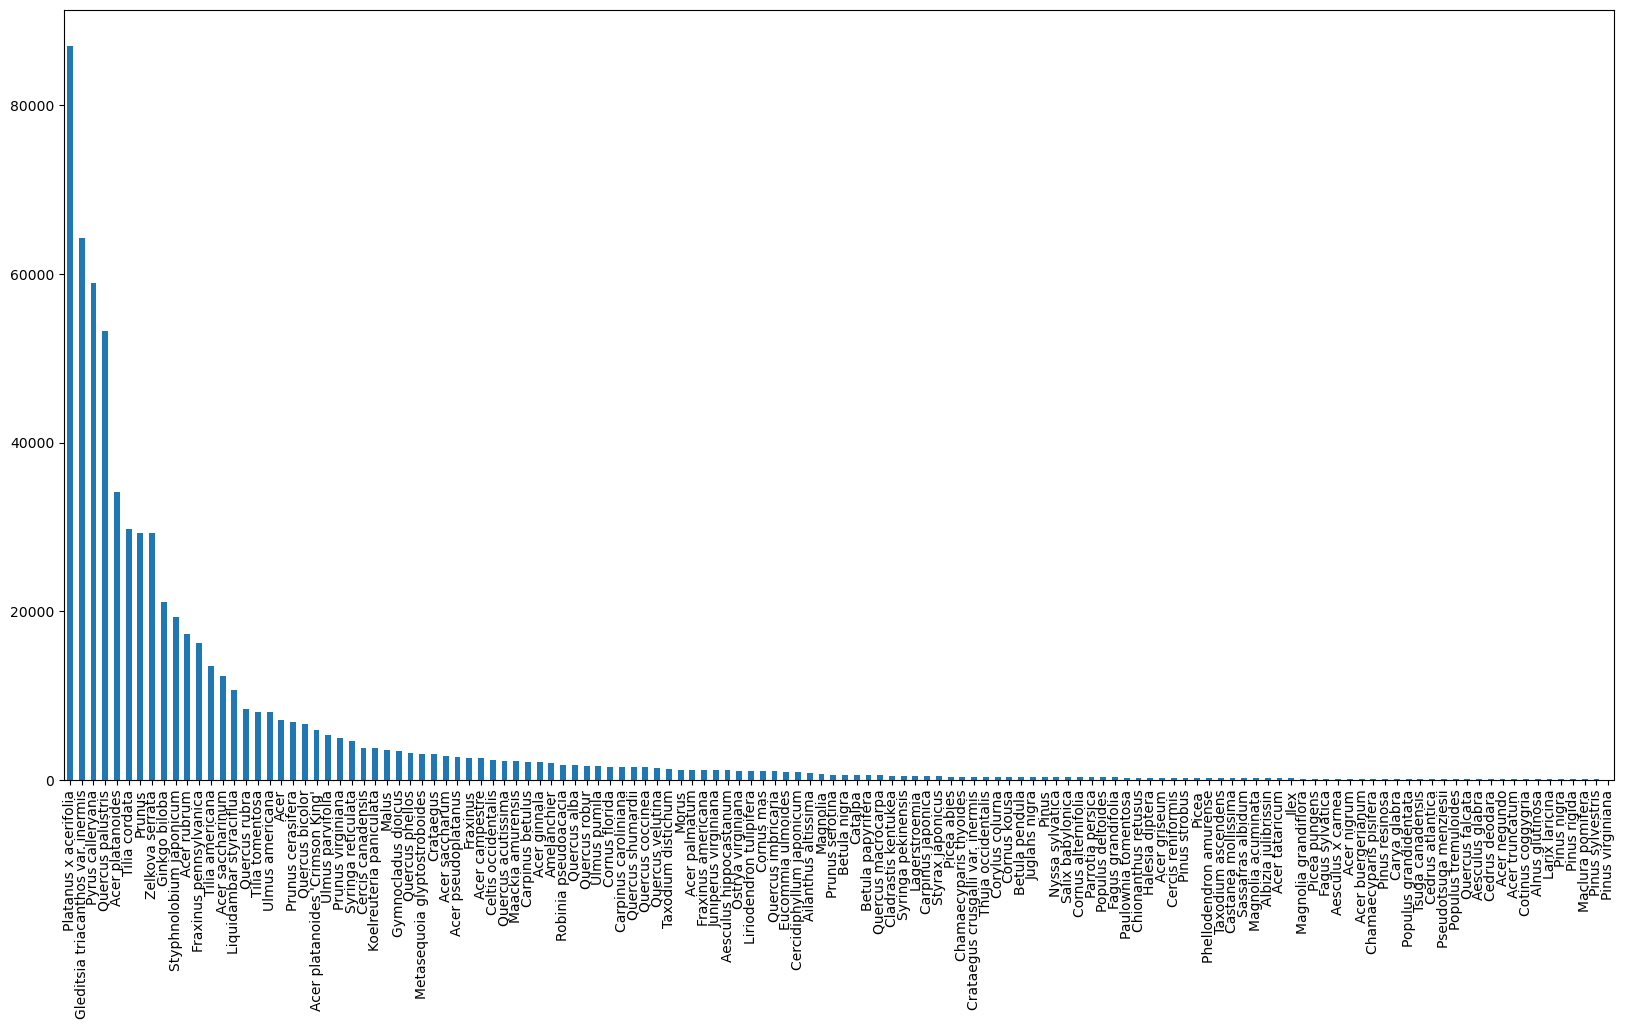

In [15]:
#visualization of how different types of trees are widespread
data_subset['spc_latin'].value_counts().plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

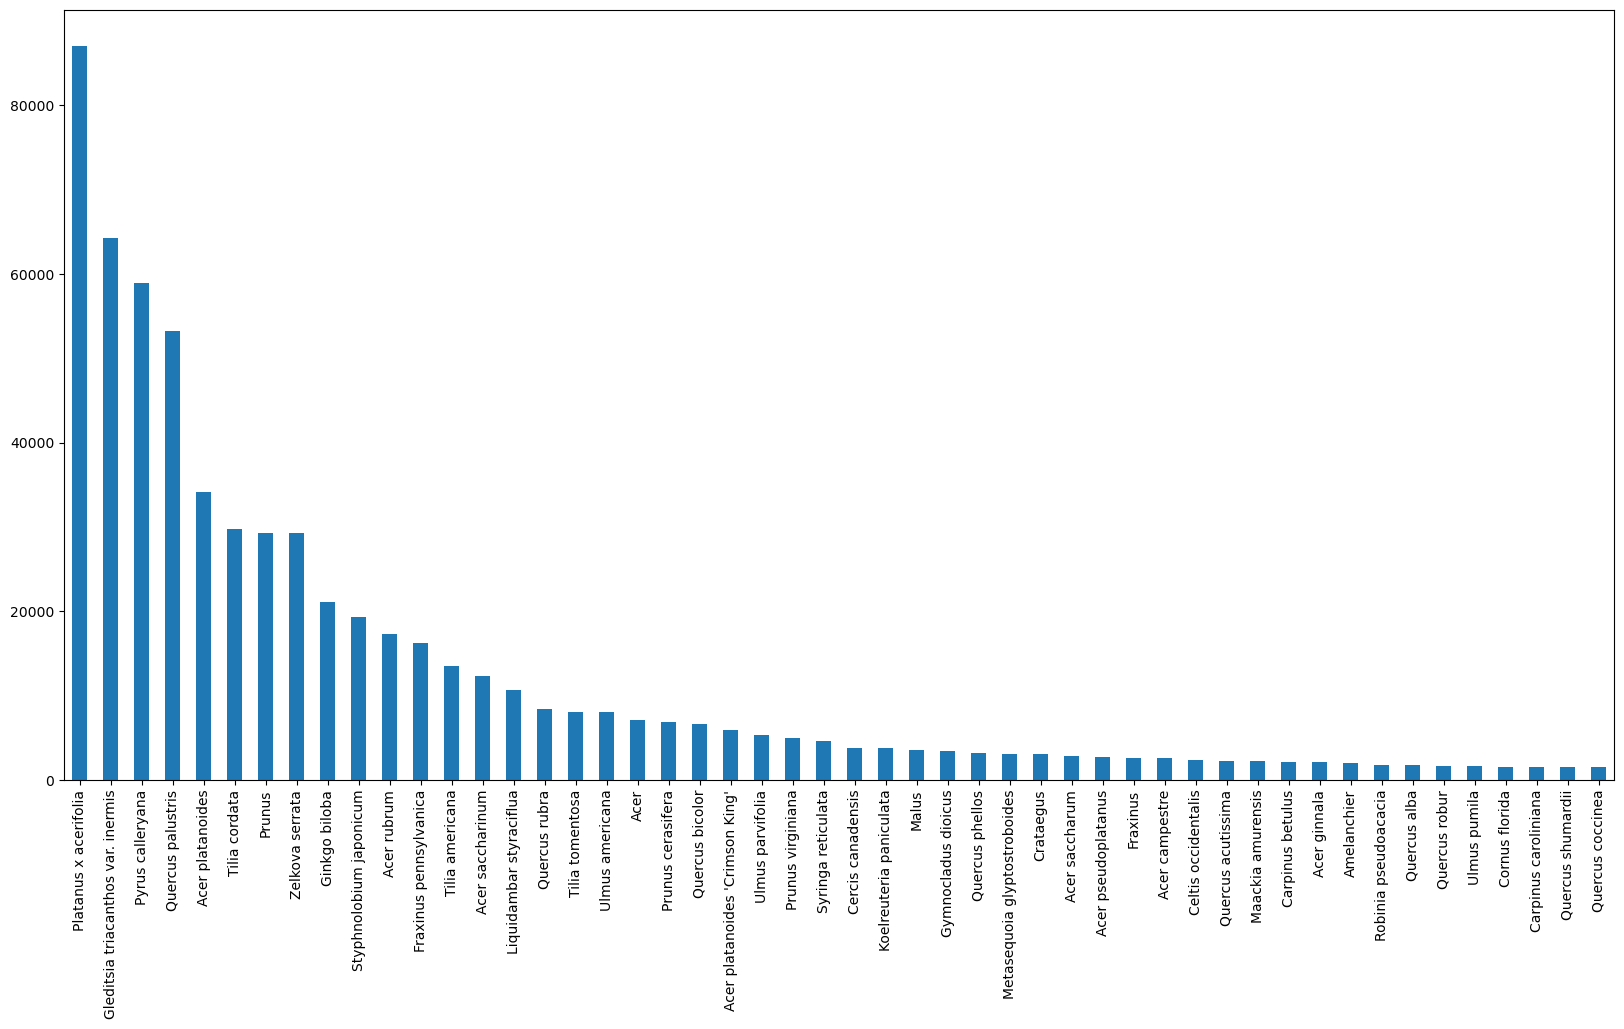

In [16]:
# for better visualization 50 first types have been chosen
data_subset['spc_latin'].value_counts().head(50).plot(kind='bar', figsize=(20,10))

In [17]:
#check if the categorical values are standard and there is no different terminology
data_subset['steward'].value_counts()

None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64

In [18]:
#check if the categorical values are standard and there is no different terminology
data_subset['sidewalk'].value_counts()

NoDamage    464978
Damage      187194
Name: sidewalk, dtype: int64

In [19]:
#check if the categorical values are standard and there is no different terminology
data_subset['status'].value_counts()

Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64

In [20]:
#check if the categorical values are standard and there is no different terminology
data_subset['curb_loc'].value_counts()

OnCurb            656896
OffsetFromCurb     26892
Name: curb_loc, dtype: int64

In [21]:
# check nan values 
# there is an assumption that most of nan values are connecnted with the stumps
stumps=data_subset[data_subset['status']=='Stump']
stump

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,09/09/2015,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,09/04/2015,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,08/27/2015,0,30,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,08/27/2015,0,10,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,09/08/2015,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,08/17/2015,0,13,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683686,191219,08/31/2015,0,25,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,08/24/2015,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,08/26/2015,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [22]:
# check nan values 
# there is an assumption that most of nan values are connecnted with the dead trees
dead=data_subset[data_subset['status']=='Dead']
dead

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,08/29/2015,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,09/07/2015,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,09/08/2015,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
266,210544,09/08/2015,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
285,188609,08/30/2015,9,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,08/29/2015,11,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
682823,155430,08/18/2015,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683346,156566,08/18/2015,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683693,156162,08/18/2015,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [23]:
# tree problems
tree_problems=data_subset[['root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
tree_problems

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
683783,No,No,No,No,No,No,No,No,No
683784,No,No,No,No,No,No,No,No,No
683785,No,No,No,No,No,No,No,No,No
683786,No,No,No,No,No,No,No,No,No


In [24]:
# how many problems and what kind of problems there are
tree_problems.apply(pd.Series.value_counts)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


In [25]:
mask=((data_subset['status']=='Stump')|(data_subset['status']=='Dead'))

In [26]:
# replacement nan values
data_subset.loc[mask,'health']=data_subset.loc[mask,'health'].fillna('Not Applicable')

In [27]:
data_subset[data_subset['status']=='Stump']

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,09/09/2015,0,16,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,09/04/2015,0,15,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,08/27/2015,0,30,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,08/27/2015,0,10,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,09/08/2015,0,15,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,08/17/2015,0,13,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683686,191219,08/31/2015,0,25,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,08/24/2015,0,5,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,08/26/2015,0,17,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [28]:
# replacement nan values
data_subset.loc[mask]=data_subset.loc[mask].fillna('Not Applicable')

In [29]:
data_subset.isna().sum()

tree_id        0
created_at     0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         1
spc_latin      5
steward        0
sidewalk       1
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
dtype: int64

In [30]:
# check nan after replacement
# can fill nan with 'Good',
# because there is no problem with this observation
data_subset[data_subset['health'].isna()]

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
32889,245041,09/21/2015,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,None,Damage,None,No,No,No,No,No,No,No,No,No


status alive, health good no problems - cah fill with no damage

In [31]:
# check nan after replacement
# can fill nan with 'no damage',
# because problems - None
data_subset[data_subset['sidewalk'].isna()]

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
346299,540677,12/29/2015,7,0,OffsetFromCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NaN,None,No,No,No,No,No,No,No,No,No


In [32]:
# check nan after replacement
# can fill nan with 'no observation'
data_subset[data_subset['spc_latin'].isna()]

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
356613,562532,05/19/2016,4,0,OnCurb,Alive,Good,NaN,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
427541,630814,07/18/2016,11,0,OnCurb,Alive,Poor,NaN,None,Damage,NaN,No,No,No,No,No,No,No,No,No
431417,651014,08/02/2016,40,0,OnCurb,Alive,Good,NaN,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
608632,47941,07/03/2015,5,0,OnCurb,Alive,Good,NaN,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
656960,150745,08/16/2015,3,0,OnCurb,Alive,Good,NaN,1or2,Damage,None,No,No,No,No,No,No,No,No,No


In [33]:
# can fill nan with 'none'
# because there is no problem in next columns
data_subset[data_subset['problems'].isna()]

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
120289,332668,10/15/2015,30,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
121488,332669,10/15/2015,28,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
121685,332670,10/15/2015,24,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
133470,332693,10/15/2015,11,0,OffsetFromCurb,Alive,Good,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
133812,332692,10/15/2015,15,0,OffsetFromCurb,Alive,Good,Quercus palustris,None,NoDamage,NaN,No,No,No,No,No,No,No,No,No
134820,332694,10/15/2015,28,0,OffsetFromCurb,Alive,Good,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
144137,332947,10/15/2015,3,0,OnCurb,Alive,Good,Ginkgo biloba,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
145324,332543,10/15/2015,9,0,OnCurb,Alive,Good,Prunus,None,Damage,NaN,No,No,No,No,No,No,No,No,No
145337,332541,10/15/2015,8,0,OnCurb,Alive,Good,Prunus,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
146314,332542,10/15/2015,8,0,OnCurb,Alive,Good,Prunus,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No


In [34]:
# replacement the last part of nan
data_subset['problems'].fillna('None', inplace=True)
data_subset['sidewalk'].fillna('NoDamage', inplace=True)
data_subset['spc_latin'].fillna('No observation', inplace=True)
data_subset['health'].fillna('Good', inplace=True)

C:\Users\el999\AppData\Local\Temp\ipykernel_68516\390621834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['problems'].fillna('None', inplace=True)
C:\Users\el999\AppData\Local\Temp\ipykernel_68516\390621834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['sidewalk'].fillna('NoDamage', inplace=True)
C:\Users\el999\AppData\Local\Temp\ipykernel_68516\390621834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [35]:
data_subset.isna().sum()

tree_id       0
created_at    0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
steward       0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
dtype: int64

dealing with outliers

In [36]:
# outliers: the trees and stumps with diameter > 60 inches
big_trees_stumps=data_subset[(data_subset['tree_dbh']>60)|(data_subset['stump_diam']>60)]
big_trees_stumps

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,08/23/2015,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,None,No,No,No,No,No,No,No,No,No
4887,139665,08/12/2015,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
6466,166008,08/22/2015,0,72,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
6724,209349,09/08/2015,122,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
7042,206818,09/06/2015,0,100,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667425,151958,08/17/2015,66,0,OffsetFromCurb,Alive,Fair,Quercus rubra,None,NoDamage,None,No,No,No,No,No,No,No,No,No
673105,165324,08/22/2015,79,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
674016,184879,08/29/2015,105,0,OnCurb,Alive,Fair,Ginkgo biloba,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
681736,179366,08/27/2015,281,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No


exclude theese trees and stumps to calculate statistics witjout outliers

In [39]:
# exclude the trees and stumps with diameter > 60 inches
data_subset=data_subset[(data_subset['tree_dbh']<=60)&(data_subset['stump_diam']<=60)]
data_subset

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No


alive tree but stump diameter = 0 so separate dataset for stump or dead, and for alive

In [57]:
# alive tree has stump diameter 0
# split dataset and make subset for the alive trees
subset_alive=data_subset[data_subset['status']=='Alive']
subset_dead_or_stump=data_subset[(data_subset['status']=='Dead')|(data_subset['status']=='Stump')]

In [58]:
subset_alive

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No


In [59]:
# group dataset with the alive trees by type
# we can see that some types have min value for diameter = 0
subset_alive.groupby('spc_latin')['tree_dbh'].describe()

,count,mean,std,min,25%,50%,75%,max
spc_latin,,,,,,,,
Acer,7080.0,11.675424,6.577626,0.0,7.0,11.0,15.0,59.0
Acer buergerianum,110.0,8.090909,4.544470,2.0,5.0,8.0,10.0,28.0
Acer campestre,2549.0,7.103962,4.293100,0.0,4.0,6.0,9.0,35.0
Acer ginnala,2049.0,7.869204,4.853365,0.0,4.0,7.0,10.0,40.0
Acer griseum,220.0,3.509091,3.578846,1.0,2.0,2.0,3.0,30.0
...,...,...,...,...,...,...,...,...
Tsuga canadensis,88.0,5.193182,3.959153,0.0,2.0,3.5,7.0,21.0
Ulmus americana,7972.0,11.933768,9.374470,0.0,4.0,9.0,17.0,58.0
Ulmus parvifolia,5344.0,7.396894,5.669532,0.0,3.0,5.0,10.0,53.0


In [61]:
# the list of th alive trees with diameter = 0
subset_alive[subset_alive['tree_dbh']==0]

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
5312,38793,06/28/2015,0,0,OnCurb,Alive,Good,Cotinus coggygria,3or4,Damage,None,No,No,No,No,No,No,No,No,No
30524,204988,09/05/2015,0,0,OnCurb,Alive,Good,Quercus phellos,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
44772,241329,09/20/2015,0,0,OffsetFromCurb,Alive,Good,Malus,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
47154,173248,08/25/2015,0,0,OnCurb,Alive,Good,Quercus bicolor,None,NoDamage,None,No,No,No,No,No,No,No,No,No
47484,204173,09/05/2015,0,0,OnCurb,Alive,Poor,Picea abies,None,NoDamage,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658977,162280,08/20/2015,0,0,OnCurb,Alive,Poor,Quercus bicolor,None,Damage,None,No,No,No,No,No,No,No,No,No
671073,17796,06/12/2015,0,0,OnCurb,Alive,Fair,Taxodium distichum,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
671971,120612,08/05/2015,0,0,OnCurb,Alive,Good,Juniperus virginiana,None,NoDamage,None,No,No,No,No,No,No,No,No,No
672443,116239,08/04/2015,0,0,OnCurb,Alive,Good,Acer palmatum,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No


In [63]:
# exclude from dataset_alive trees with diameter = 0
subset_alive=subset_alive[subset_alive['tree_dbh']!=0]
subset_alive

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No


In [64]:
# dealing with the outliers and replacement with the stutistics from describe-function
stats_alive=subset_alive.groupby('spc_latin')['tree_dbh'].describe().reset_index()[['spc_latin','25%','75%']]
stats_alive

,spc_latin,25%,75%
0,Acer,7.0,15.0
1,Acer buergerianum,5.0,10.0
2,Acer campestre,4.0,9.0
3,Acer ginnala,4.0,10.0
4,Acer griseum,2.0,3.0
...,...,...,...
128,Tsuga canadensis,2.0,7.0
129,Ulmus americana,4.0,17.0
130,Ulmus parvifolia,3.0,10.0
131,Ulmus pumila,4.0,17.0


In [65]:
# dealing with the outliers and replacement with the stutistics from describe-function
# subset_alive merge with columns from describe-function: '25%', '75%'
subset_alive=subset_alive.merge(stats_alive, on='spc_latin', how='left')
subset_alive

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,180683,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651796,155433,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No,8.0,24.0
651797,183795,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,3.0,5.0
651798,166161,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
651799,184028,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0


if diameter lower or higher to use 25% or 75% values for replacement

In [66]:
# dealing with the outliers and replacement with the stutistics from describe-function
# if the diameter lower of 25% value for the certain type of tree - replace it with 25% value
mask_25=subset_alive['tree_dbh']<subset_alive['25%']
subset_alive.loc[mask,'tree_dbh']=subset_alive['25%']

In [67]:
subset_alive

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,180683,08/27/2015,5.0,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,09/03/2015,21.0,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,09/05/2015,6.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,09/05/2015,10.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,08/30/2015,21.0,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651796,155433,08/18/2015,25.0,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No,8.0,24.0
651797,183795,08/29/2015,7.0,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,3.0,5.0
651798,166161,08/22/2015,12.0,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
651799,184028,08/29/2015,5.0,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0


In [68]:
# dealing with the outliers and replacement with the stutistics from describe-function
# if the diameter higher of 75% value for the certain type of tree - replace it with 75% value
mask_75=subset_alive['tree_dbh']<subset_alive['75%']
subset_alive.loc[mask,'tree_dbh']=subset_alive['75%']

In [69]:
subset_alive

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,180683,08/27/2015,14.0,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,09/03/2015,21.0,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,09/05/2015,13.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,09/05/2015,10.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,08/30/2015,21.0,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651796,155433,08/18/2015,25.0,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No,8.0,24.0
651797,183795,08/29/2015,7.0,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,3.0,5.0
651798,166161,08/22/2015,12.0,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
651799,184028,08/29/2015,14.0,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0


In [70]:
# remove the columns '25%', '75%'
subset_alive.drop(columns=['25%','75%'], axis=1, inplace=True)

In [71]:
subset_alive

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,08/27/2015,14.0,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,09/03/2015,21.0,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,09/05/2015,13.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,09/05/2015,10.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,08/30/2015,21.0,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651796,155433,08/18/2015,25.0,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
651797,183795,08/29/2015,7.0,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
651798,166161,08/22/2015,12.0,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
651799,184028,08/29/2015,14.0,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
